In [1]:
import os
import numpy as np
import iris
import matplotlib.pyplot as plt
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
from textwrap import wrap
from src.ploter_functions import pcolormesh_basemapplot
from src.ploter_functions import median_correlation_plot
from src.ploter_functions import difference_to_ensemble_plot

In [2]:
results_figures_path = '/home/users/carter10/Antarctica_Climate_Variability/results/Paper_Figures/'

# Figure 2

/home/users/carter10/.conda/envs/cordex-analysis-env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


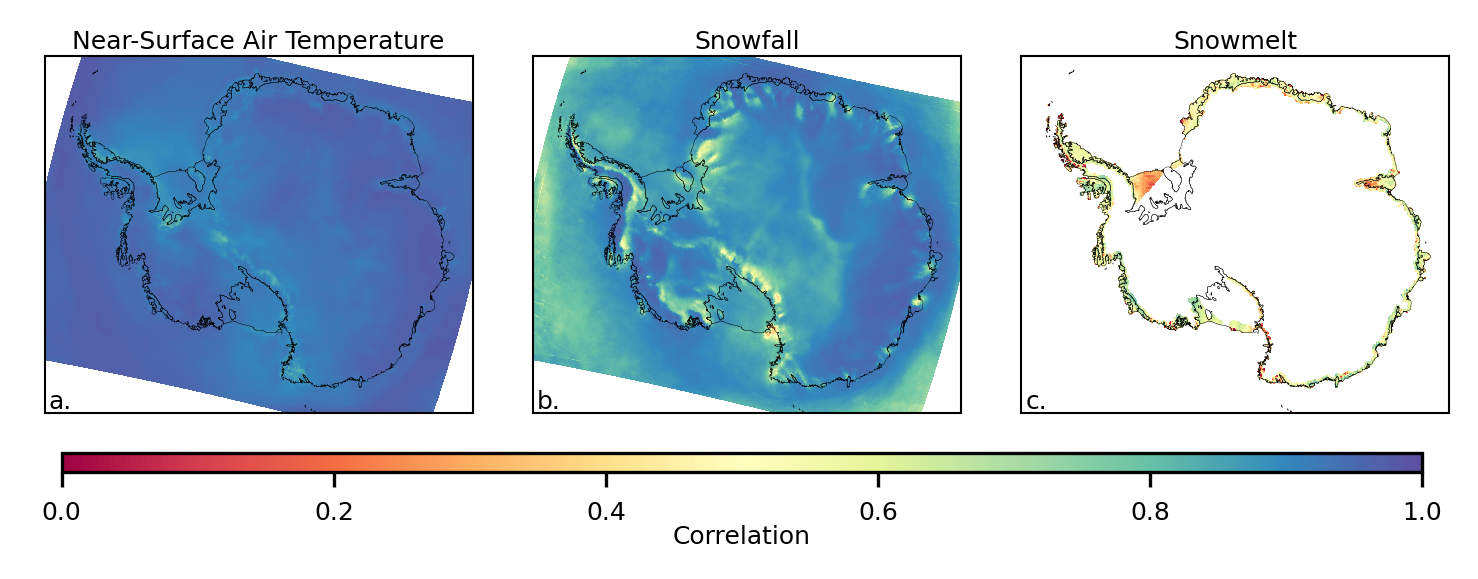

In [3]:
input_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Ensemble_Array_Data/'
mask_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Mask_Data/'
grid_cube_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Postprocessed_Data/MetUM_011_ERA_INT_tas_2000.nc'
variables = ['temperature','snowfall','melt']
component = [2] # 0=Trend component, 1=Seasonal component, 2=Residual component
land_only_mask = np.load(f'{mask_path}metum011_grid_land_filter.npy')
mean_melt = np.load(f'{input_path}mean_melt.npy')
grid_cube = iris.load(grid_cube_path)[0][0]

antarctica_map = Basemap(width=6000000,height=5000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(16*cm, 4.0*cm),dpi= 300)
fig.subplots_adjust(hspace=0.01, wspace=0.0)
       
median_correlation_plot(input_path,variables,component,land_only_mask,mean_melt,antarctica_map,grid_cube)    

label_height = .01
title_height = 0.95
for axis,label,title in zip(plt.gcf().get_axes(),['a.','b.','c.'],['Near-Surface Air Temperature','Snowfall','Snowmelt']):
    [x.set_linewidth(0.5) for x in axis.spines.values()] #Setting border line width
    axis.set_title(title,loc='center',y=title_height,fontsize=6) # Setting column titles
    axis.annotate(label,xy=(0.01,label_height),xycoords='axes fraction',fontsize=6) # Setting labels

cax = fig.add_axes([0.15, 0.0, 0.72, 0.04]) #left,bottom,width,height
cbar = plt.colorbar(cax=cax,orientation="horizontal")
cbar.ax.tick_params(labelsize=6)
colorbar_label = "\n".join(wrap('Correlation', 100))
cbar.set_label(colorbar_label,labelpad=0,fontsize=6)

fig.savefig(f'{results_figures_path}Figure_2.png',dpi=300,bbox_inches='tight')

# Figure 3

In [4]:
input_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Ensemble_Array_Data/'
mask_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Mask_Data/'
grid_cube_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Postprocessed_Data/MetUM_011_ERA_INT_tas_2000.nc'
variables = ['snowfall','temperature','melt']
land_only_mask = np.load(f'{mask_path}metum011_grid_land_filter.npy')
mean_melt = np.load(f'{input_path}mean_melt.npy')
grid_cube = iris.load(grid_cube_path)[0][0]

In [5]:
models = [1,3,5,7] #[0:ERAI,1:ERA5,2:MetUM(044),3:MetUM(011),4:MAR(ERAI),5:MAR(ERA5),6:RACMO(ERAI),7:RACMO(ERA5)]
vmin=-3
vmax=3
label_xy = [.01,.02]
title_height = 0.96
row_xy = [-0.05,0.5]
col_titles = ['Mean','Seasonal Standard Deviation','Residual Standard Deviation']
row_titles = ['ERA5','MetUM(011)','MAR(ERA5)', 'RACMO(ERA5)']
labels = ['a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.']

In [6]:
variable = variables[0] 

antarctica_map = Basemap(width=6000000,height=5000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(4, 3, sharex='col',dpi= 300, sharey='row',figsize=(17.7*cm,17.7*cm))
fig.subplots_adjust(hspace=0.01, wspace=0.015)

difference_to_ensemble_plot(input_path,antarctica_map,vmin,vmax,variable,models,grid_cube,land_only_mask,mean_melt)

fig.subplots_adjust(bottom=0.02)
cax = fig.add_axes([0.13, 0.0, 0.77, 0.01]) #left,bottom,width,height
cbar = plt.colorbar(cax=cax,orientation="horizontal")
cbar.ax.tick_params(labelsize=6)

colorbar_label = "\n".join(wrap('Proportional Difference to Ensemble Average', 100))
cbar.set_label(colorbar_label,labelpad=3,fontsize=6)

for axis,label in zip(plt.gcf().get_axes(),labels):
    [x.set_linewidth(0.5) for x in axis.spines.values()] #Setting border line width
    axis.annotate(label,xy=(label_xy[0],label_xy[1]),xycoords='axes fraction',fontsize=6) # Setting labels
for axis,coltitle in zip(plt.gcf().get_axes(),col_titles):
    axis.set_title(coltitle,loc='center',y=title_height,fontsize=6) # Setting column titles
for axis,rowtitle in zip(plt.gcf().get_axes()[::3],row_titles):
    axis.annotate(rowtitle,xy=(row_xy[0],row_xy[1]),xycoords='axes fraction',fontsize=6,rotation=90,va='center') # Setting row titles
    
fig.savefig(f'{results_figures_path}Figure_3.png',dpi=300,bbox_inches='tight')

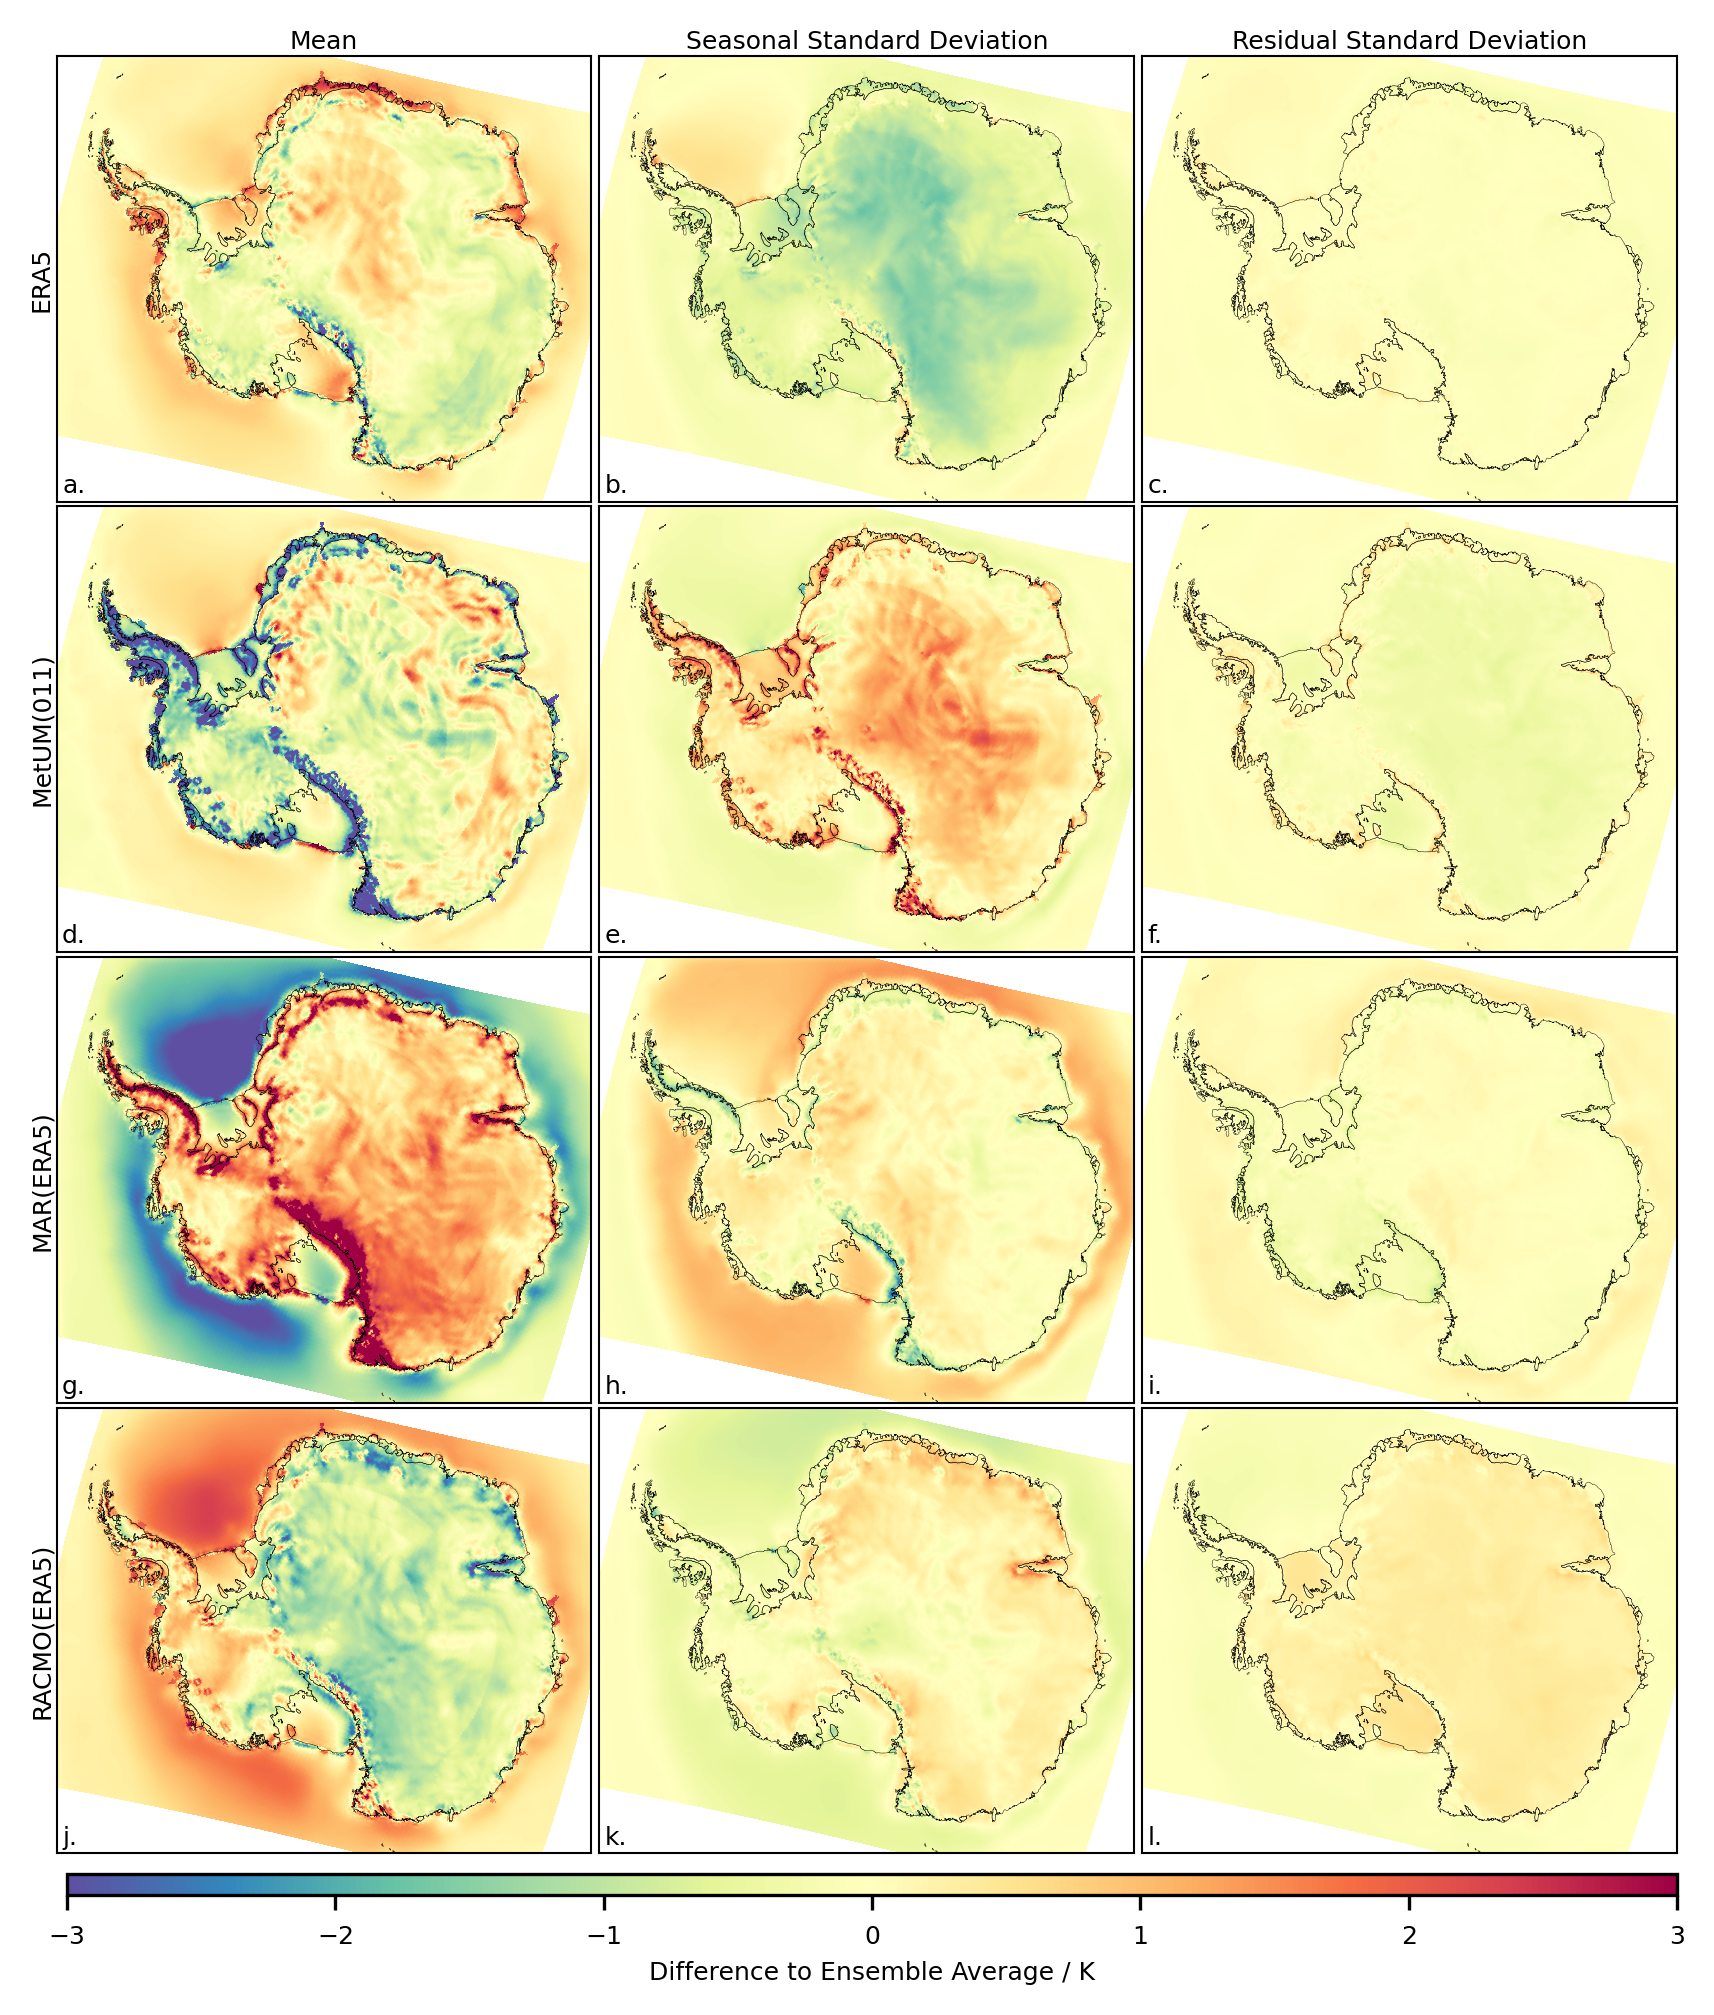

In [7]:
variable = variables[1] 

antarctica_map = Basemap(width=6000000,height=5000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(4, 3, sharex='col',dpi= 300, sharey='row',figsize=(17.7*cm,17.7*cm))
fig.subplots_adjust(hspace=0.01, wspace=0.015)

difference_to_ensemble_plot(input_path,antarctica_map,vmin,vmax,variable,models,grid_cube,land_only_mask,mean_melt)

fig.subplots_adjust(bottom=0.02)
cax = fig.add_axes([0.13, 0.0, 0.77, 0.01]) #left,bottom,width,height
cbar = plt.colorbar(cax=cax,orientation="horizontal")
cbar.ax.tick_params(labelsize=6)

colorbar_label = "\n".join(wrap('Difference to Ensemble Average / K', 100))
cbar.set_label(colorbar_label,labelpad=3,fontsize=6)

for axis,label in zip(plt.gcf().get_axes(),labels):
    [x.set_linewidth(0.5) for x in axis.spines.values()] #Setting border line width
    axis.annotate(label,xy=(label_xy[0],label_xy[1]),xycoords='axes fraction',fontsize=6) # Setting labels
for axis,coltitle in zip(plt.gcf().get_axes(),col_titles):
    axis.set_title(coltitle,loc='center',y=title_height,fontsize=6) # Setting column titles
for axis,rowtitle in zip(plt.gcf().get_axes()[::3],row_titles):
    axis.annotate(rowtitle,xy=(row_xy[0],row_xy[1]),xycoords='axes fraction',fontsize=6,rotation=90,va='center') # Setting row titles
    
fig.savefig(f'{results_figures_path}Figure_4.png',dpi=300,bbox_inches='tight')

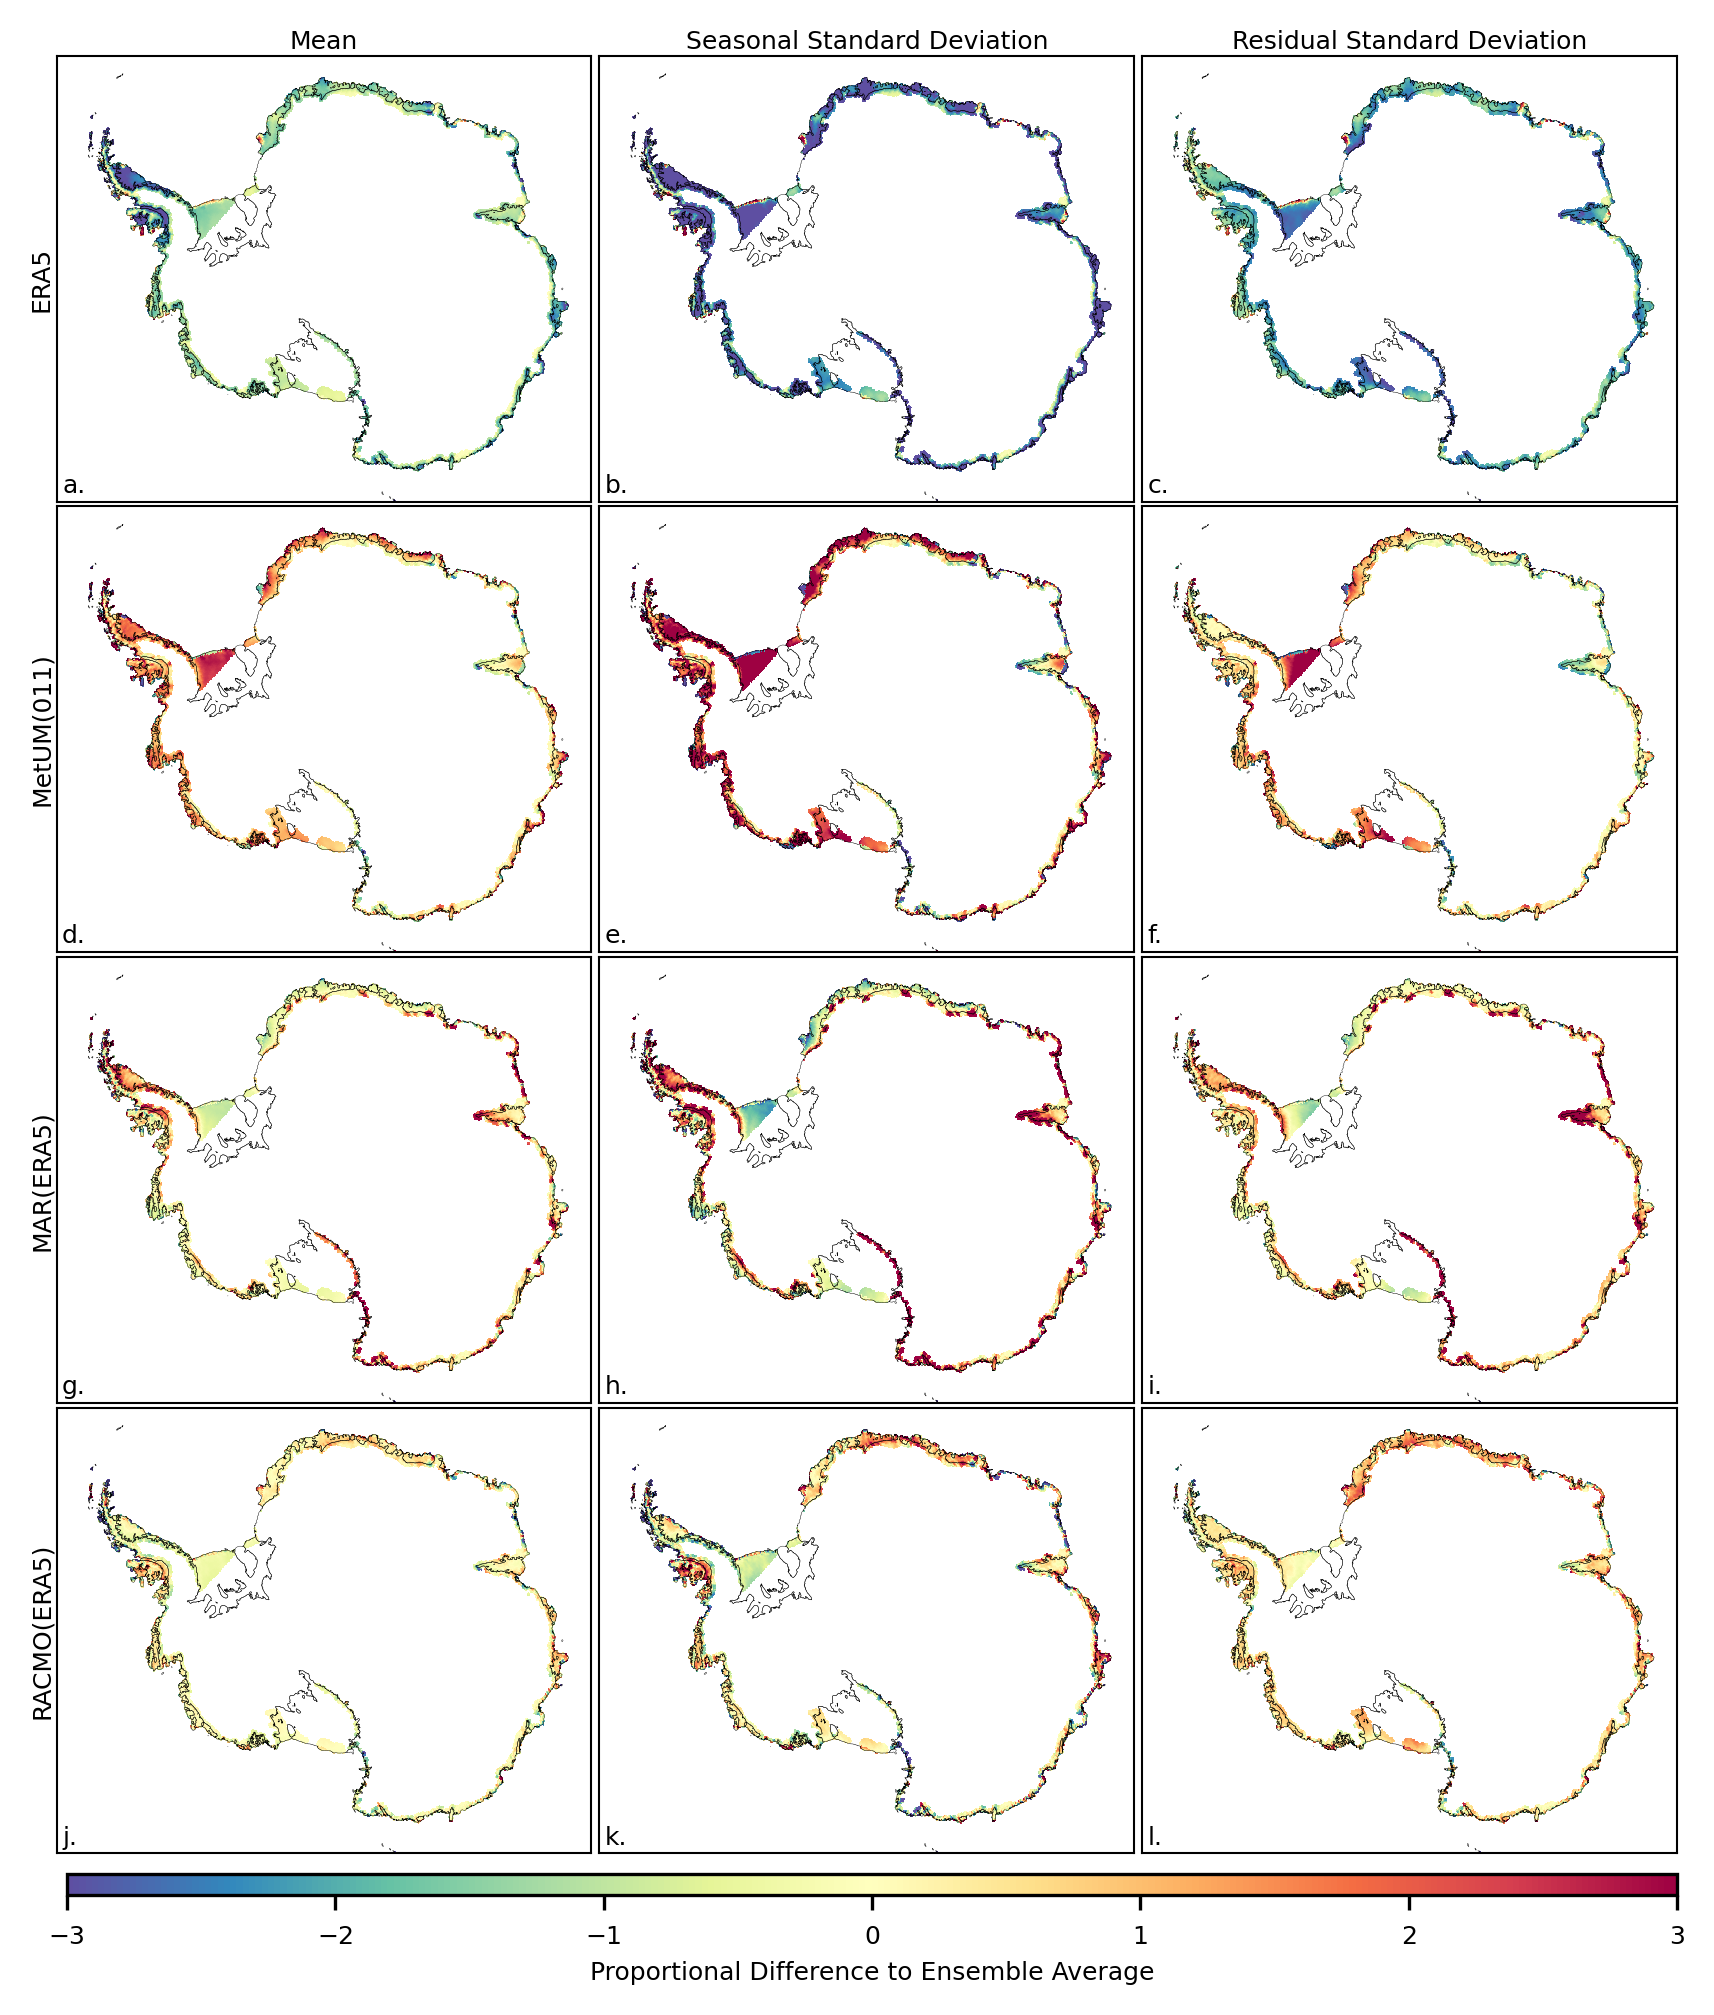

In [8]:
variable = variables[2] 

antarctica_map = Basemap(width=6000000,height=5000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(4, 3, sharex='col',dpi= 300, sharey='row',figsize=(17.7*cm,17.7*cm))
fig.subplots_adjust(hspace=0.01, wspace=0.015)

difference_to_ensemble_plot(input_path,antarctica_map,vmin,vmax,variable,models,grid_cube,land_only_mask,mean_melt)

fig.subplots_adjust(bottom=0.02)
cax = fig.add_axes([0.13, 0.0, 0.77, 0.01]) #left,bottom,width,height
cbar = plt.colorbar(cax=cax,orientation="horizontal")
cbar.ax.tick_params(labelsize=6)

colorbar_label = "\n".join(wrap('Proportional Difference to Ensemble Average', 100))
cbar.set_label(colorbar_label,labelpad=3,fontsize=6)

for axis,label in zip(plt.gcf().get_axes(),labels):
    [x.set_linewidth(0.5) for x in axis.spines.values()] #Setting border line width
    axis.annotate(label,xy=(label_xy[0],label_xy[1]),xycoords='axes fraction',fontsize=6) # Setting labels
for axis,coltitle in zip(plt.gcf().get_axes(),col_titles):
    axis.set_title(coltitle,loc='center',y=title_height,fontsize=6) # Setting column titles
for axis,rowtitle in zip(plt.gcf().get_axes()[::3],row_titles):
    axis.annotate(rowtitle,xy=(row_xy[0],row_xy[1]),xycoords='axes fraction',fontsize=6,rotation=90,va='center') # Setting row titles
    
fig.savefig(f'{results_figures_path}Figure_5.png',dpi=300,bbox_inches='tight')